In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pymysql

In [14]:
host = '127.0.0.1'
user = 'root'
password = 'root@1234'
port = 3306
database = 'tasks'

In [15]:
conn = pymysql.connect(
    host = host,
    user = user, 
    password = password,
    port = port,
    database = database
)

In [16]:
query = 'SELECT * FROM `bank_dataset_excel`'

In [17]:
df = pd.read_sql(query, conn)

C:\Users\hp\AppData\Local\Temp\ipykernel_18152\1168034203.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [19]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous days of contacted,previous contacts before this campaign,previous outcome of campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y (the target)
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


In [20]:
df['job'] = df['job'].replace({'admin.':'admin', 'self-employed':'self employed','blue-collar':'blue collar'})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age                                     41188 non-null  int64  
 1   job                                     41188 non-null  object 
 2   marital                                 41188 non-null  object 
 3   education                               41188 non-null  object 
 4   default                                 41188 non-null  object 
 5   housing                                 41188 non-null  object 
 6   loan                                    41188 non-null  object 
 7   contact                                 41188 non-null  object 
 8   month                                   41188 non-null  object 
 9   day_of_week                             41188 non-null  object 
 10  duration                                41188 non-null  in

# Splitting Columns into df1 and df2

In [23]:
# here we are splitting the data into two dataframes; df1 consists on demographic data and df2 consists on behavioral data

In [24]:
# df1 is demographic data which includes the columns named age, job, marital, education, default, housing, loan and y(the target).
df1 = df.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous days of contacted', 'previous contacts before this campaign', 'previous outcome of campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

In [25]:
df1.head()

,age,job,marital,education,default,housing,loan,y (the target)
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41188 non-null  int64 
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   y (the target)  41188 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.5+ MB


In [27]:
# df2 is behavioral data which includes the columns named contact, month, day_of_week, duration, campaign, previous days of contacted, previous contacts before this campaign, previous outcome of campaign, nr.employed and y(the target).
df2 = df.drop(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan'], axis=1)

In [28]:
df2.head()

,contact,month,day_of_week,duration,campaign,previous days of contacted,previous contacts before this campaign,previous outcome of campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y (the target)
0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   contact                                 41188 non-null  object 
 1   month                                   41188 non-null  object 
 2   day_of_week                             41188 non-null  object 
 3   duration                                41188 non-null  int64  
 4   campaign                                41188 non-null  int64  
 5   previous days of contacted              41188 non-null  int64  
 6   previous contacts before this campaign  41188 non-null  int64  
 7   previous outcome of campaign            41188 non-null  object 
 8   emp.var.rate                            41188 non-null  float64
 9   cons.price.idx                          41188 non-null  float64
 10  cons.conf.idx                           41188 non-null  fl

In [29]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
y (the target)    0
dtype: int64

In [30]:
df2.isnull().sum()

contact                                   0
month                                     0
day_of_week                               0
duration                                  0
campaign                                  0
previous days of contacted                0
previous contacts before this campaign    0
previous outcome of campaign              0
emp.var.rate                              0
cons.price.idx                            0
cons.conf.idx                             0
euribor3m                                 0
nr.employed                               0
y (the target)                            0
dtype: int64

# working on df1 (demographic)

In [44]:
independent_df1 = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
dependent_df1 = ['y (the target)']
x = df1[independent_df1]
y = df1[dependent_df1]

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [49]:
x_train.shape

(32950, 7)

In [50]:
x_test.shape 

(8238, 7)

In [51]:
y_train.shape

(32950, 1)

In [52]:
y_test.shape 

(8238, 1)

In [53]:
# using ordinal encoding method to convert x's text (object) into numerical values whereas using label encoder for converting y's text (object) into numerical values

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [55]:
transformer = ColumnTransformer(
    transformers=[
        ('Ord_Enco', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
         ['job', 'marital', 'education', 'default', 'housing', 'loan'])
    ],
        remainder='passthrough'
)

In [56]:
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [57]:
# now doing the same working for the dependent variable which is "y"

In [58]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
clf = DecisionTreeClassifier()

In [61]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [63]:
y_pred = clf.predict(x_test)

In [64]:
# now finding the accuracy_score after applying decision tree algorithm 

In [66]:
from sklearn.metrics import accuracy_score 

In [67]:
accuracy_score(y_test, y_pred)

0.8585821801408109

In [68]:
from sklearn.tree import plot_tree

[Text(0.7842035913222265, 0.9833333333333333, 'x[6] <= 60.5\ngini = 0.199\nsamples = 32950\nvalue = [29259, 3691]'),
 Text(0.5854510396077365, 0.95, 'x[3] <= 0.5\ngini = 0.186\nsamples = 32213\nvalue = [28865, 3348]'),
 Text(0.3078288373651957, 0.9166666666666666, 'x[6] <= 28.5\ngini = 0.209\nsamples = 25369\nvalue = [22363, 3006]'),
 Text(0.06591024886965446, 0.8833333333333333, 'x[0] <= 7.5\ngini = 0.303\nsamples = 2993\nvalue = [2435, 558]'),
 Text(0.03664606872113625, 0.85, 'x[2] <= 5.5\ngini = 0.252\nsamples = 2030\nvalue = [1730, 300]'),
 Text(0.016960024010766118, 0.8166666666666667, 'x[1] <= 1.5\ngini = 0.2\nsamples = 1400\nvalue = [1242, 158]'),
 Text(0.006919231526394093, 0.7833333333333333, 'x[4] <= 0.5\ngini = 0.132\nsamples = 507\nvalue = [471, 36]'),
 Text(0.0025043487241053247, 0.75, 'x[6] <= 25.5\ngini = 0.171\nsamples = 244\nvalue = [221, 23]'),
 Text(0.0006196326740054411, 0.7166666666666667, 'x[0] <= 5.5\ngini = 0.055\nsamples = 71\nvalue = [69, 2]'),
 Text(0.0004130

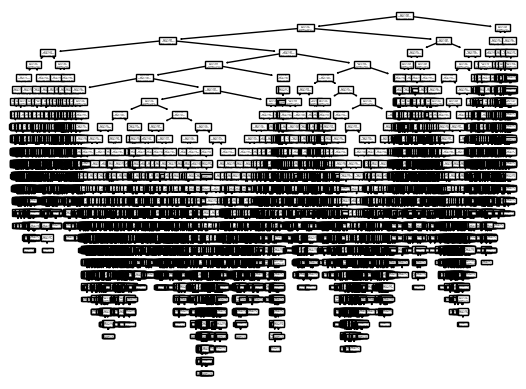

In [69]:
plot_tree(clf)

In [70]:
# now finding the precision, recall and f1 score for finding more accuracy 

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report 

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      7289
           1       0.23      0.10      0.14       949

    accuracy                           0.86      8238
   macro avg       0.56      0.53      0.53      8238
weighted avg       0.82      0.86      0.83      8238



# Working on df2 (behavioral)

In [112]:
independent_df2 = ['contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous days of contacted', 'previous contacts before this campaign', 'previous outcome of campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
dependent_df2 = ['y (the target)']
x1 = df2[independent_df2]
y1 = df2[dependent_df2]

In [113]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)

In [114]:
transformer1 = ColumnTransformer(
    transformers = [
        ('Ord_Enc', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
        ['contact', 'month', 'day_of_week', 'previous outcome of campaign'])
    ],
    remainder = 'passthrough'
)

In [115]:
x1_train = transformer1.fit_transform(x1_train)
x1_test = transformer1.transform(x1_test)

In [116]:
x1_train.shape

(32950, 13)

In [117]:
x1_test.shape

(8238, 13)

In [118]:
le1 = LabelEncoder()

In [119]:
y1_train = le.fit_transform(y1_train)
y1_test = le.transform(y1_test)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [120]:
y1_train.shape

(32950,)

In [121]:
y1_test.shape

(8238,)

In [122]:
clf1 = DecisionTreeClassifier()

In [123]:
clf1.fit(x1_train, y1_train)

DecisionTreeClassifier()

In [124]:
y1_pred = clf1.predict(x1_test)

In [125]:
accuracy_score(y1_test, y1_pred)

0.8848021364408837

[Text(0.40879350137578463, 0.9848484848484849, 'x[12] <= 5087.5\ngini = 0.2\nsamples = 32950\nvalue = [29241, 3709]'),
 Text(0.11709478397329062, 0.9545454545454546, 'x[4] <= 161.5\ngini = 0.496\nsamples = 3956\nvalue = [2164, 1792]'),
 Text(0.035116629032745, 0.9242424242424242, 'x[6] <= 14.5\ngini = 0.269\nsamples = 1352\nvalue = [1135, 217]'),
 Text(0.007939118971444408, 0.8939393939393939, 'x[2] <= 1.5\ngini = 0.457\nsamples = 215\nvalue = [139, 76]'),
 Text(0.0026752725395194884, 0.8636363636363636, 'x[5] <= 2.5\ngini = 0.32\nsamples = 95\nvalue = [76, 19]'),
 Text(0.0022789358669980824, 0.8333333333333334, 'x[4] <= 86.0\ngini = 0.385\nsamples = 73\nvalue = [54, 19]'),
 Text(0.001882599194476677, 0.803030303030303, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.0026752725395194884, 0.803030303030303, 'x[4] <= 106.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.0007926733450428113, 0.7727272727272727, 'x[11] <= 0.692\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),


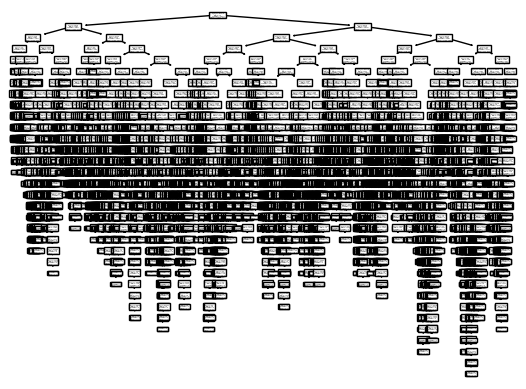

In [126]:
plot_tree(clf1)

In [127]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7307
           1       0.49      0.50      0.49       931

    accuracy                           0.88      8238
   macro avg       0.71      0.72      0.71      8238
weighted avg       0.89      0.88      0.89      8238



# Working Collectively on df (Overall data)

In [129]:
xr_independent = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous days of contacted', 'previous contacts before this campaign', 'previous outcome of campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
yr_dependent = ['y (the target)']
xr = df[xr_independent]
yr = df[yr_dependent]

In [130]:
xr_train, xr_test, yr_train, yr_test = train_test_split(xr, yr, test_size=0.2)

In [131]:
xr_train.shape

(32950, 20)

In [132]:
xr_test.shape

(8238, 20)

In [133]:
yr_train.shape

(32950, 1)

In [134]:
yr_test.shape

(8238, 1)

In [135]:
transformer = ColumnTransformer(
    transformers = [
        ('Ord_Enc', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
        ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous outcome of campaign'])
    ],
        remainder = 'passthrough'
)

In [141]:
xr_train = transformer.fit_transform(xr_train)
xr_test = transformer.transform(xr_test)

In [142]:
le_r = LabelEncoder()

yr_train = le_r.fit_transform(yr_train)
yr_test = le_r.transform(yr_test)

In [143]:
clf_r = DecisionTreeClassifier()

In [144]:
clf_r.fit(xr_train, yr_train)

DecisionTreeClassifier()

In [146]:
yr_pred = clf_r.predict(xr_test)

In [147]:
accuracy_score(yr_test, yr_pred)

0.8939062879339645

In [148]:
print(classification_report(yr_test, yr_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7312
           1       0.53      0.55      0.54       926

    accuracy                           0.89      8238
   macro avg       0.73      0.74      0.74      8238
weighted avg       0.90      0.89      0.89      8238



[Text(0.40206240738797067, 0.9833333333333333, 'x[19] <= 5087.5\ngini = 0.2\nsamples = 32950\nvalue = [29236, 3714]'),
 Text(0.11775127180712261, 0.95, 'x[11] <= 161.5\ngini = 0.495\nsamples = 3967\nvalue = [2183, 1784]'),
 Text(0.03535597673026825, 0.9166666666666666, 'x[13] <= 11.0\ngini = 0.276\nsamples = 1386\nvalue = [1157, 229]'),
 Text(0.011687671618672112, 0.8833333333333333, 'x[8] <= 1.5\ngini = 0.473\nsamples = 206\nvalue = [127, 79]'),
 Text(0.005857917341406745, 0.85, 'x[16] <= 93.559\ngini = 0.354\nsamples = 87\nvalue = [67, 20]'),
 Text(0.004055481236358516, 0.8166666666666667, 'x[13] <= 3.5\ngini = 0.437\nsamples = 59\nvalue = [40, 19]'),
 Text(0.0022530451313102864, 0.7833333333333333, 'x[18] <= 0.877\ngini = 0.499\nsamples = 29\nvalue = [15, 14]'),
 Text(0.001351827078786172, 0.75, 'x[12] <= 2.5\ngini = 0.444\nsamples = 18\nvalue = [6, 12]'),
 Text(0.0009012180525241146, 0.7166666666666667, 'x[1] <= 1.5\ngini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.00045060902

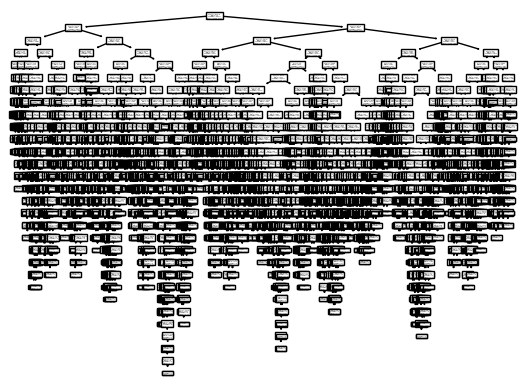

In [149]:
plot_tree(clf_r)